<a href="https://colab.research.google.com/github/OlhaDot/NewProjectStadyAcademy/blob/master/STRESS_TEST_AVAL_as_of_31_12_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
import numpy as np
import matplotlib.dates as mdates
import matplotlib

In [ ]:
sns.set(rc= {'figure.figsize':(15,10)})
sns.set(font_scale = 2)
sns.set_style('whitegrid')

In [ ]:
from sklearn.datasets import load_iris
from scipy import stats

In [ ]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names']+['target'])

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
target_names = {i: iris["target_names"][i] for i in range (3) }

In [ ]:
target_names

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [ ]:
df["target_name"] = df["target"].map(target_names)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df['sepal length (cm)'].mean()

5.843333333333334

In [ ]:
stats.mode(df[df['target_name']== 'setosa']['petal length (cm)'])

ModeResult(mode=1.4, count=13)

In [ ]:
df['target'].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [ ]:
df['target'].unique()

array([0., 1., 2.])

In [ ]:
df['petal length (cm)'].value_counts()

1.4    13
1.5    13
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: petal length (cm), dtype: int64

In [ ]:
df['petal length (cm)'].value_counts().index[0]

1.4

In [ ]:
df['petal length (cm)'].quantile(0.1)

1.4

In [ ]:
df["cumsum"] = df['petal length (cm)'].cumsum()


In [ ]:
# normalization
df["normalization"] = df["cumsum"]/df["cumsum"].max()


<Axes: >

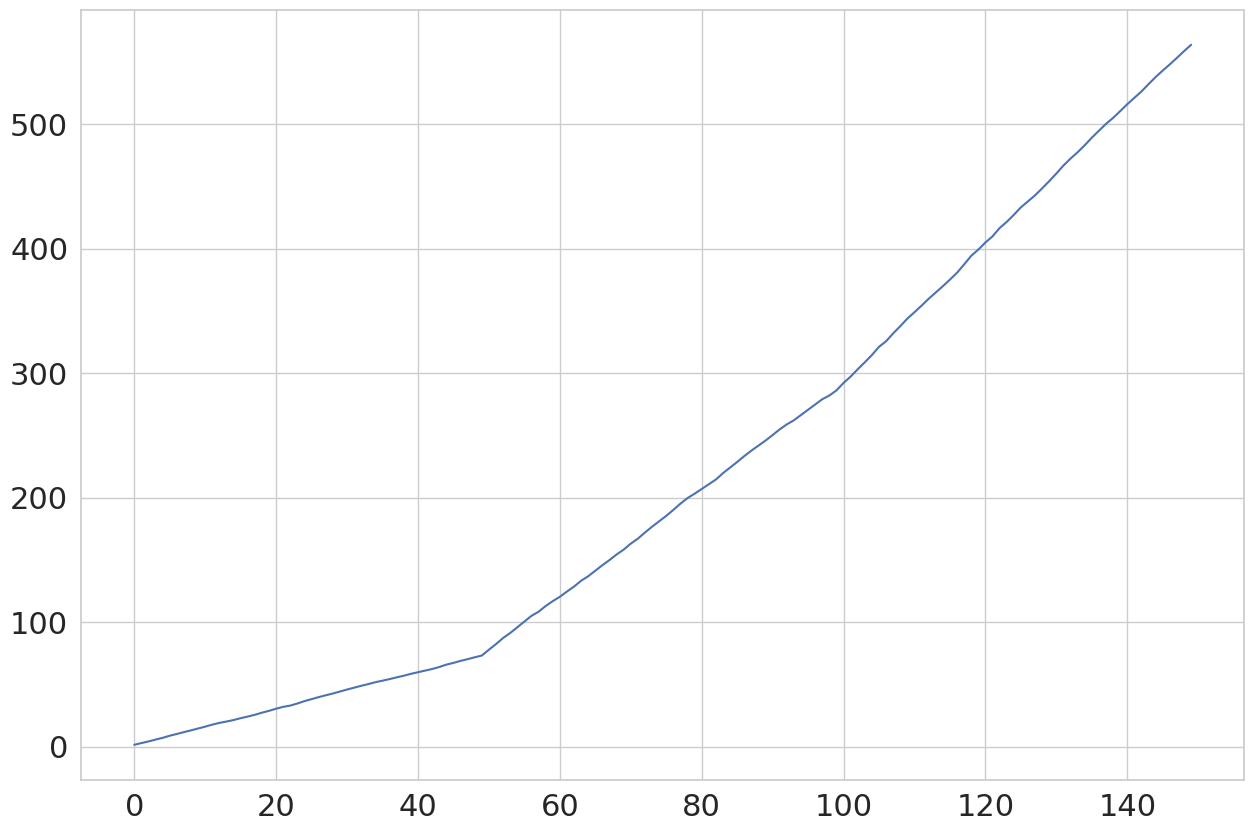

In [ ]:
df["cumsum"].plot()

<Axes: >

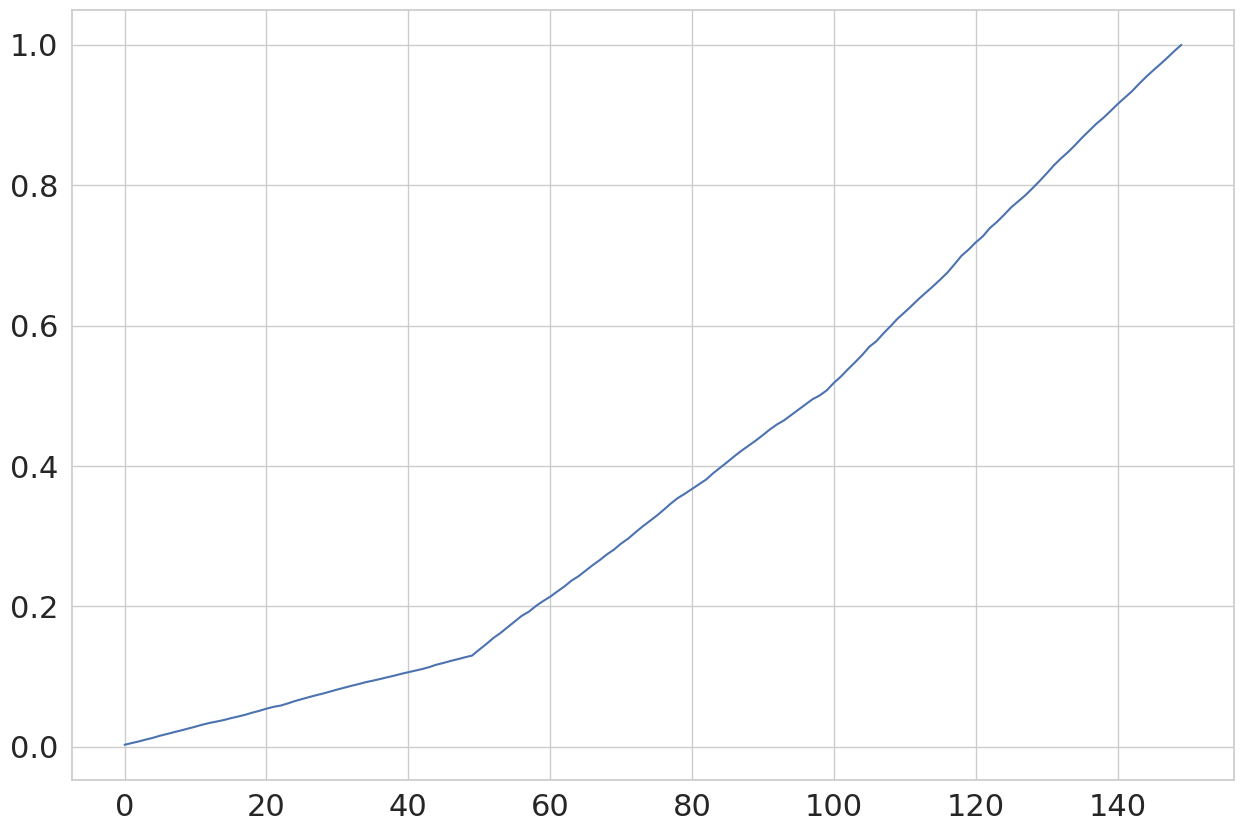

In [ ]:

df["normalization"].plot()

In [ ]:
df["normalization"]

0      0.002484
1      0.004967
2      0.007273
3      0.009934
4      0.012418
         ...   
145    0.963278
146    0.972148
147    0.981373
148    0.990953
149    1.000000
Name: normalization, Length: 150, dtype: float64

In [ ]:
y = [2,4,5,6]
y_hat_1 = [4,6,8,10]
y_hat_2 = [4,6,8,12]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
print("case1", mean_absolute_error(y, y_hat_1))
print("case1", mean_absolute_error(y, y_hat_2))

print("case1", np.sqrt(mean_squared_error(y, y_hat_1)))
print("case1",  np.sqrt(mean_squared_error(y, y_hat_2)))

case1 2.75
case1 3.25
case1 2.8722813232690143
case1 3.640054944640259


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/OlhaDot/NewProjectStadyAcademy/master/day.csv', names=None)
df.head(4)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562


In [ ]:
df_bike = df.groupby('dteday').agg({'temp': np.mean,
                                  "cnt": np.sum})
df_bike.head()

,temp,cnt
dteday,,
2011-01-01,0.344167,985
2011-01-02,0.363478,801
2011-01-03,0.196364,1349
2011-01-04,0.200000,1562
2011-01-05,0.226957,1600


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
mod = LinearRegration()
fig, ax = plt.subplots()

for i in range(1,100):
  tmp = df_bike.sample(frac = 0.1)
  mod.fit(tmp[['temp']], tmp['cnt'])
  tmp.loc[:, 'preds'] = mod.predict(tmp[['temp']])
  tmp.sort_values(by = 'temp', inplace = True)
  ax.plot(tmp['temp'], tmp['preds'], color ='grey')

plt.show()

NameError: ignored

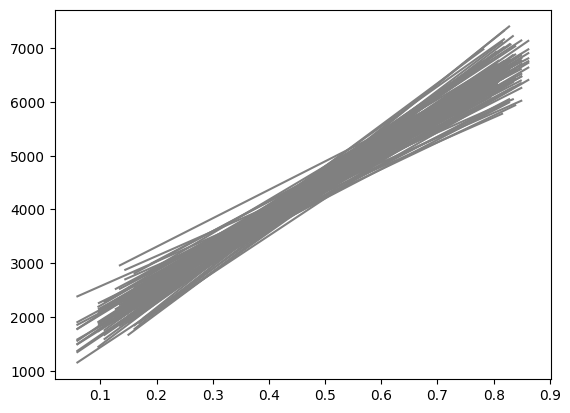

In [ ]:
mod = LinearRegression()
fig, ax = plt.subplots()

for i in range(1, 100):
    tmp = df_bike.sample(frac=0.1)

    mod.fit(tmp[['temp']], tmp['cnt'])

    tmp.loc[:, 'preds'] = mod.predict(tmp[['temp']])
    tmp.sort_values(by='temp', inplace=True)
    ax.plot(tmp['temp'], tmp['preds'], color='grey')

plt.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/OlhaDot/NewProjectStadyAcademy/master/shampoo_sales.csv')
df.head(4)

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3


<Axes: >

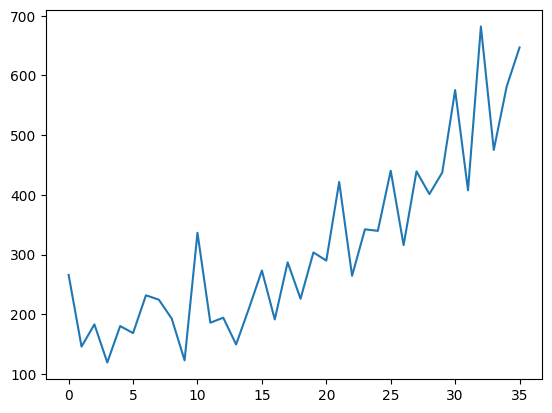

In [ ]:
df['Sales'].plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from dateutil.relativedelta import relativedelta

In [ ]:
# Convert the 'was' column to datetime format
df['Month'] = pd.to_datetime(df['Month'], format='%m-%d')

# Specify the desired starting date
start_date = pd.to_datetime('2023-01-01')

# Create the 'is' column by shifting 'was' by one period and specifying the starting date
df['FullDate'] = df['Month'].shift() + (start_date - df['Month'].iloc[0])

In [ ]:
s = pd.Series(index=pd.to_datetime(df['FullDate']), data=df['Sales'].values)
s

FullDate
NaT           266.0
2023-01-01    145.9
2023-01-02    183.1
2023-01-03    119.3
2023-01-04    180.3
2023-01-05    168.5
2023-01-06    231.8
2023-01-07    224.5
2023-01-08    192.8
2023-01-09    122.9
2023-01-10    336.5
2023-01-11    185.9
2023-01-12    194.3
2023-02-01    149.5
2023-02-02    210.1
2023-02-03    273.3
2023-02-04    191.4
2023-02-05    287.0
2023-02-06    226.0
2023-02-07    303.6
2023-02-08    289.9
2023-02-09    421.6
2023-02-10    264.5
2023-02-11    342.3
2023-02-12    339.7
2023-03-01    440.4
2023-03-02    315.9
2023-03-03    439.3
2023-03-04    401.3
2023-03-05    437.4
2023-03-06    575.5
2023-03-07    407.6
2023-03-08    682.0
2023-03-09    475.3
2023-03-10    581.3
2023-03-11    646.9
dtype: float64

In [ ]:
results = seasonal_decompose(s, model='additive', period=12)

<Axes: xlabel='FullDate'>

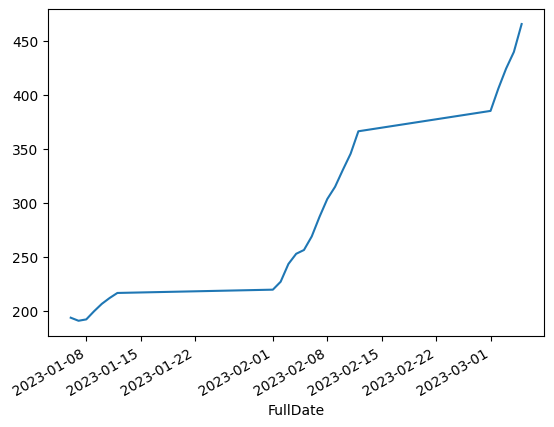

In [ ]:
results.trend.plot()

<Axes: xlabel='FullDate'>

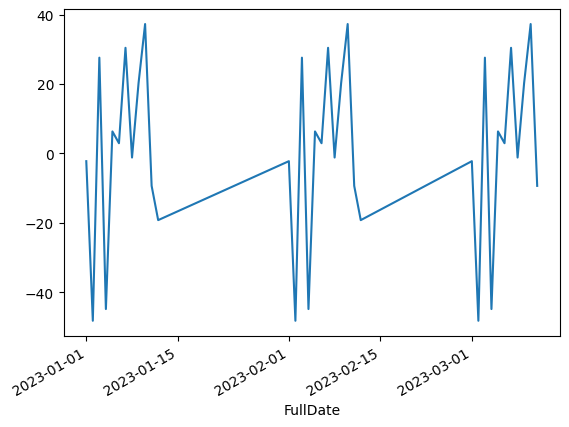

In [ ]:
results.seasonal.plot()

<Axes: xlabel='FullDate'>

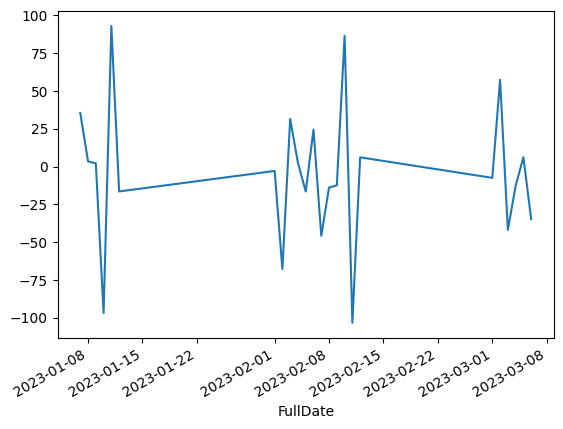

In [ ]:
results.resid.plot()

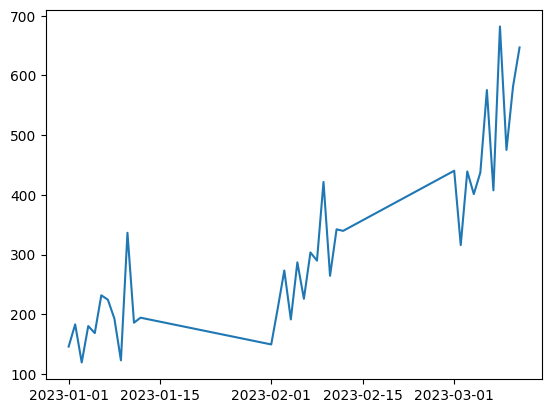

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['FullDate'], df['Sales'], label='Original')
ax.plot(df['FullDate'], df['Diff'], label='Original')

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [21]:
url = 'https://raw.githubusercontent.com/OlhaDot/NewProjectStadyAcademy/master/StressTestAval/input_data.csv'
data = pd.read_csv(url, sep=';')
print(data.head())


       data  GDP  Unemployment  Inflation  add1  add2        DR
0  20120331  2.4           9.8   2.863995   NaN   NaN  0.059238
1  20120630  3.0           9.2  -0.369418   NaN   NaN  0.063927
2  20120930 -1.3           8.7  -0.033344   NaN   NaN  0.065745
3  20121231 -2.4           8.8  -0.133378   NaN   NaN  0.066180
4  20120331 -1.3           9.5  -0.500302   NaN   NaN  0.099236


In [22]:
data2 = data.copy()
data2.drop('data', axis=1, inplace=True)

In [56]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GDP           96 non-null     float64
 1   Unemployment  96 non-null     float64
 2   Inflation     96 non-null     float64
 3   add1          0 non-null      float64
 4   add2          0 non-null      float64
 5   DR            96 non-null     float64
dtypes: float64(6)
memory usage: 4.6 KB


(array([ 3.,  5.,  5., 19.,  5.,  5.,  9.,  8.,  4.,  2.,  4.,  2.,  4.,
         0.,  1.,  2.,  2.,  1.,  0.,  0.,  1.,  2.,  4.,  1.,  1.,  2.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.]),
 array([0.01222617, 0.02048231, 0.02873844, 0.03699458, 0.04525071,
        0.05350685, 0.06176298, 0.07001912, 0.07827526, 0.08653139,
        0.09478753, 0.10304366, 0.1112998 , 0.11955593, 0.12781207,
        0.1360682 , 0.14432434, 0.15258047, 0.16083661, 0.16909274,
        0.17734888, 0.18560501, 0.19386115, 0.20211728, 0.21037342,
        0.21862956, 0.22688569, 0.23514183, 0.24339796, 0.2516541 ,
        0.25991023, 0.26816637, 0.2764225 , 0.28467864, 0.29293477,
        0.30119091, 0.30944704, 0.31770318, 0.32595931, 0.33421545,
        0.34247159]),
 <BarContainer object of 40 artists>)

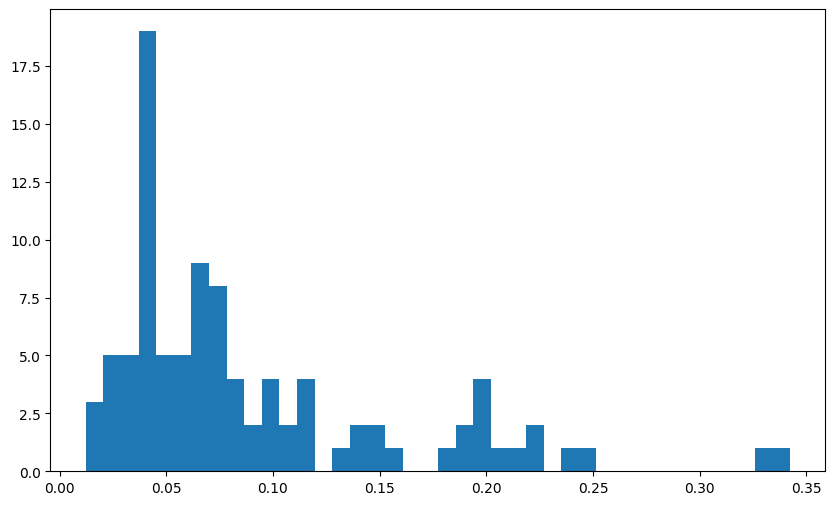

In [28]:
plt.figure(figsize = (10,6))
plt.hist(data2['DR'], bins = 40)

In [27]:
data2.describe()

,GDP,Unemployment,Inflation,add1,add2,DR
count,96.000000,96.000000,96.000000,0.0,0.0,96.000000
mean,-2.771875,9.314792,6.818860,NaN,NaN,0.090590
std,3.629912,0.498186,10.059747,NaN,NaN,0.068718
min,-16.000000,7.600000,-0.500302,NaN,NaN,0.012226
25%,-3.932500,9.207500,3.317500,NaN,NaN,0.042284
50%,-3.695000,9.405000,3.555000,NaN,NaN,0.067024
75%,-1.300000,9.600000,3.792500,NaN,NaN,0.113374
max,4.700000,10.500000,58.926844,NaN,NaN,0.342472


CORRELATIONS

In [15]:
data.corr()

,GDP,Unemployment,Inflation,add1,add2,DR
GDP,1.000000,0.463746,-0.257266,NaN,NaN,0.476377
Unemployment,0.463746,1.000000,-0.492793,NaN,NaN,0.115805
Inflation,-0.257266,-0.492793,1.000000,NaN,NaN,0.203940
add1,NaN,NaN,NaN,NaN,NaN,NaN
add2,NaN,NaN,NaN,NaN,NaN,NaN
DR,0.476377,0.115805,0.203940,NaN,NaN,1.000000


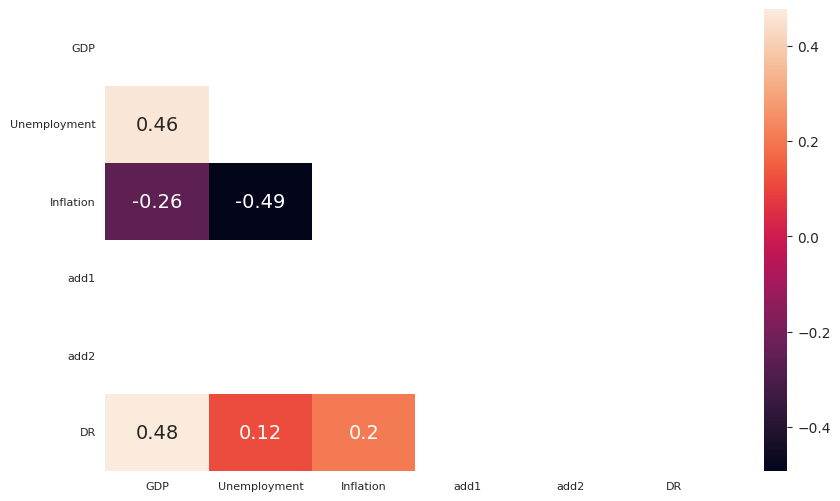

In [32]:
plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(data2.corr(), dtype=bool))
sns.heatmap(data2.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

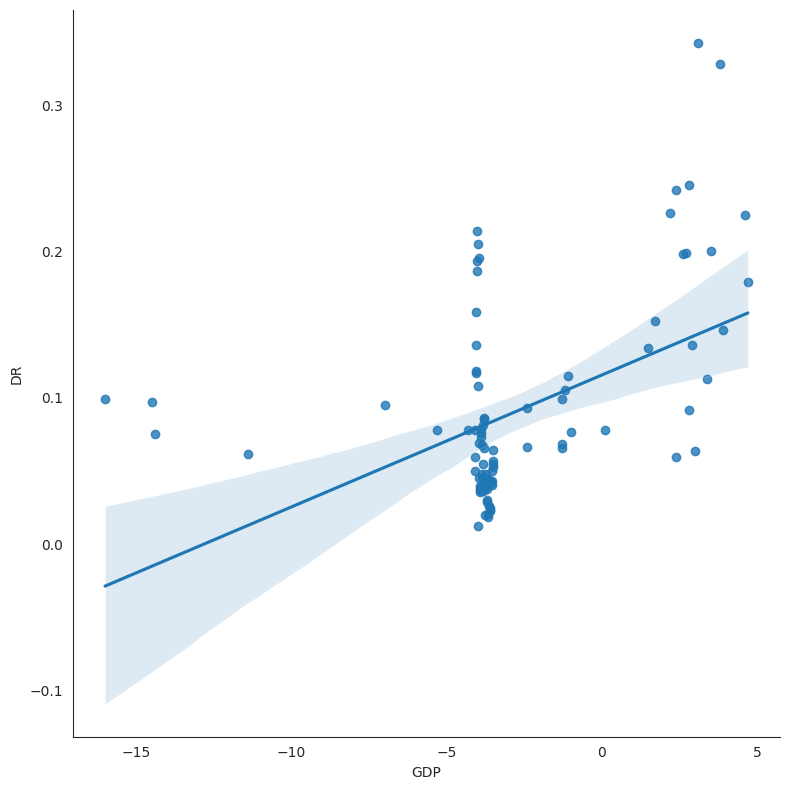

In [37]:
sns.lmplot(x='GDP', y='DR', data=data2, height=8)
plt.show()

TRAINING PART

In [75]:
# pay attention what you are dropping
DR = data2["DR"]
macro = data2.drop(['DR', 'add1', 'add2'], axis = 1)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(macro, DR, test_size=0.2, random_state=0)

In [77]:
# model train
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [78]:
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept:', regr.intercept_)
pd.DataFrame(data = regr.coef_, index = X_train.columns, columns = ['coef'])

Training data r-squared: 0.3127018663523695
Test data r-squared: 0.36397174446287706
Intercept: 0.15277532058806859


,coef
GDP,0.010191
Unemployment,-0.005321
Inflation,0.002081


In [79]:
data2['DR'].skew()

1.5568710448465064

In [80]:
data2['DR'].min()

0.012226173

In [81]:
y_log = np.log(data2['DR'])
y_log.tail()


91   -2.135044
92   -2.145182
93   -2.550838
94   -2.822807
95   -3.003101
Name: DR, dtype: float64

In [82]:
y_log.skew()

0.15158748338311348

<ipython-input-83-8228d1824536>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_log)


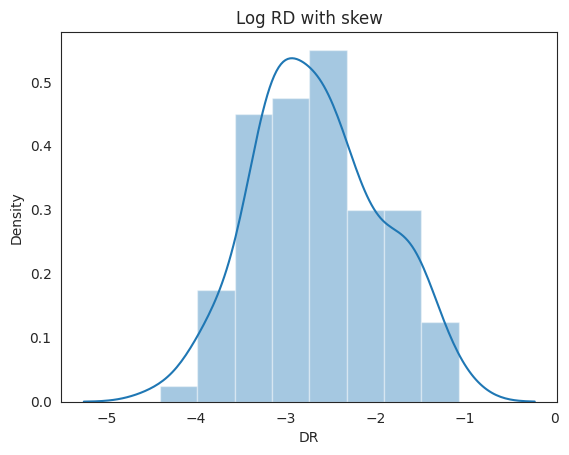

In [83]:
sns.distplot(y_log)
plt.title('Log RD with skew')
plt.show()

REGRETION USING log DR

In [95]:
DR_log = np.log(data2['DR'])
macros = data2.drop(['DR', 'add1', 'add2'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(macros, DR_log, test_size=0.2, random_state=0)

regr = LinearRegression()
regr.fit(X_train, y_train)


print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept:', regr.intercept_)
pd.DataFrame(data = regr.coef_, index = X_train.columns, columns = ['coef'])

Training data r-squared: 0.2767114075338426
Test data r-squared: 0.33586708706628454
Intercept: -0.34625568752173397


,coef
GDP,0.102417
Unemployment,-0.229302
Inflation,0.018946


**What we can drop to make better model score**

In [99]:
# P-value
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'P_value': round(results.pvalues,3)})
# P-value shoul be < 0.05 - then ok, other parameters must be excluded

,coef,P_value
const,-0.346256,0.834
GDP,0.102417,0.000
Unemployment,-0.229302,0.182
Inflation,0.018946,0.035


In [101]:
# VIF - multicollinearity - should be less as possible < 5/10
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns, 'vif': np.round(vif, 2)})

,coef_name,vif
0,const,636.36
1,GDP,1.29
2,Unemployment,1.74
3,Inflation,1.42


In [ ]:
# BIC -less BIC - better

In [118]:
#  Original model or LOG model - to decide
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
result = model.fit()

orign_coef = pd.DataFrame({'coef_name': result.params, 'p-value': np.round(results.pvalues, 3)})

print('BIC is:', results.bic)
print('r-squared:', results.rsquared)

BIC is: 142.73050847535387
r-squared: 0.2767114075338425


In [116]:
#  Original model or LOG model - to decide  WO Unemployment
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['Unemployment'], axis = 1)

model2 = sm.OLS(y_train, X_incl_const)
result2 = model2.fit()

orign_coef_wo_Unempl = pd.DataFrame({'coef_name': result2.params, 'p-value': round(result2.pvalues, 3)})

print('BIC is:', result2.bic)
print('r-squared:', result2.rsquared)

BIC is: 140.2964305007933
r-squared: 0.25843390545679423


In [117]:
#  Original model or LOG model - to decide  WO Unemployment+ Inflation
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['Unemployment', 'Inflation'], axis = 1)

model3 = sm.OLS(y_train, X_incl_const)
result3 = model3.fit()

orign_coef_wo_Unempl_Infl = pd.DataFrame({'coef_name': result3.params, 'p-value': round(result3.pvalues, 3)})

print('BIC is:', result3.bic)
print('r-squared:', result3.rsquared)

BIC is: 146.47993239844945
r-squared: 0.14840633472723896


In [120]:
#  Original model - to decide  WO Unemployment
model_org = sm.OLS(y_train, X_train)
result_org = model_org.fit()

orign_coef= pd.DataFrame({'coef_name': result_org.params, 'p-value': round(result_org.pvalues, 3)})

print('BIC is:', result_org.bic)
print('r-squared:', result_org.rsquared)

BIC is: 138.44672290175077
r-squared: 0.9590786211677362


In [121]:
#  Original model - to decide  WO Unemployment
X_train = X_train.drop(['Unemployment'], axis = 1)

model_org = sm.OLS(y_train, X_train)
result_org = model_org.fit()

orign_coef= pd.DataFrame({'coef_name': result_org.params, 'p-value': round(result_org.pvalues, 3)})

print('BIC is:', result_org.bic)
print('r-squared:', result_org.rsquared)

BIC is: 320.43868093154504
r-squared: 0.5250227080591805


In [122]:
#  Original model - to decide  WO Inflation
X_train = X_train.drop(['Inflation'], axis = 1)

model_org = sm.OLS(y_train, X_train)
result_org = model_org.fit()

orign_coef= pd.DataFrame({'coef_name': result_org.params, 'p-value': round(result_org.pvalues, 3)})

print('BIC is:', result_org.bic)
print('r-squared:', result_org.rsquared)

BIC is: 321.6073651793936
r-squared: 0.489378937630776
